In [1]:
#https://neuralprophet.com/html/contents.html

In [2]:
### https://github.com/chiragsamal/NeuralProphet-Tutorial/blob/main/neuralprophet-time-series-forecasting-tutorial.ipynb

In [3]:
from neuralprophet import NeuralProphet

In [4]:
import pandas as pd
#from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [5]:
df_excel=pd.read_excel('james_training.xlsx')

In [6]:

df_excel.head()

,Date,Sales,Returns
0,2012-01-01,5549,901
1,2012-01-02,4285,684
2,2012-01-03,3950,1534
3,2012-01-04,3996,1641
4,2012-01-05,4413,1151


In [7]:
df=df_excel

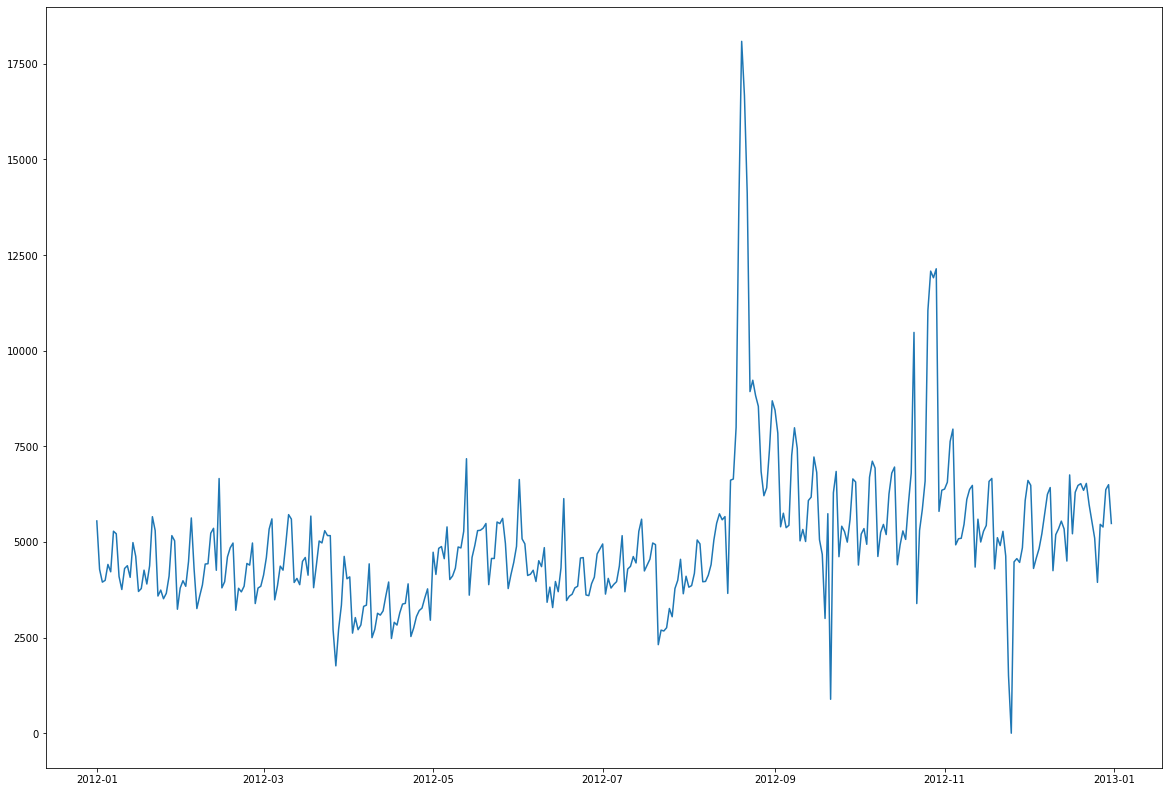

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,14)
plt.plot(df['Date'], df['Sales'])
plt.show()

In [9]:
data = df[['Date', 'Sales']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

WARNING - (py.warnings._showwarnmsg) - <ipython-input-9-2ca3712025c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,2012-01-01,5549
1,2012-01-02,4285
2,2012-01-03,3950
3,2012-01-04,3996
4,2012-01-05,4413


In [10]:
data.tail()

,ds,y
361,2012-12-27,5461
362,2012-12-28,5391
363,2012-12-29,6368
364,2012-12-30,6498
365,2012-12-31,5484


In [45]:
data.shape

(366, 2)

In [11]:
m = NeuralProphet()

In [12]:
df=data

In [13]:
m = NeuralProphet()
df_train, df_val = m.split_df(df, freq='M', valid_p = 0.2)
metrics = m.fit(df_train, freq='M', validation_df=df_val, progress='bar')


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.727% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.659% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 305


  0%|          | 0/114 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.07E+00, min: 4.08E-01


  0%|          | 0/114 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.23E+00, min: 1.77E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.22E-01
Epoch[305/305]: 100%|█| 305/305 [00:06<00:00, 48.17it/s, SmoothL1Loss=0.0182, MAE=614, RMSE=1.02e+3, RegLoss=


In [14]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,0.571088,6445.429797,7392.461317,0.0,0.492458,5756.536133,7006.698730
1,0.425402,5325.478504,6247.682307,0.0,0.436261,5229.818848,6530.368652
2,0.305758,4366.077325,5223.851582,0.0,0.350634,4628.564941,5687.157227
3,0.211772,3541.673719,4262.640737,0.0,0.244456,3802.020996,4618.579590
4,0.134307,2757.127741,3361.780403,0.0,0.130116,2757.921143,3340.437744
...,...,...,...,...,...,...,...
300,0.018175,613.120660,1051.881760,0.0,0.203653,3850.210205,4175.937500
301,0.018165,613.265024,1070.148455,0.0,0.203185,3845.209717,4171.137695
302,0.018163,613.614038,1048.739490,0.0,0.203059,3844.018066,4169.830078
303,0.018161,613.657922,1020.187471,0.0,0.203055,3843.999023,4169.778809


In [15]:
future = m.make_future_dataframe(df, periods=12, n_historic_predictions=len(df))
forecast = m.predict(future)
forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.727% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.561% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.561% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency D


,ds,y,yhat1,residual1,trend,season_weekly
0,2012-01-01,5549,5432.389648,-116.610352,4504.311523,928.078125
1,2012-01-02,4285,3802.588623,-482.411377,4493.551758,-690.963257
2,2012-01-03,3950,4159.616699,209.616699,4482.791992,-323.175812
3,2012-01-04,3996,4028.428467,32.428467,4472.032227,-443.603851
4,2012-01-05,4413,4295.620117,-117.379883,4461.272949,-165.652298
...,...,...,...,...,...,...
373,2013-08-31,None,-15383.521484,None,-15928.705078,545.184326
374,2013-09-30,None,-18564.000000,None,-17873.037109,-690.963257
375,2013-10-31,None,-20047.828125,None,-19882.175781,-165.652298
376,2013-11-30,None,-21281.320312,None,-21826.503906,545.184326


In [43]:
#Calculate standard deviation

forecast['yhat1'][0:366]

0      5432.389648
1      3802.588623
2      4159.616699
3      4028.428467
4      4295.620117
          ...     
361     -86.055969
362     164.918091
363     495.159790
364     813.242310
365    -870.610229
Name: yhat1, Length: 366, dtype: float64

In [28]:
df_std1=forecast['y'][0:366]
df_std2=forecast['yhat1'][0:366]

In [32]:
type(df_std1)

pandas.core.series.Series

In [36]:
df_stand_deviation=pd.concat([df_std1,df_std2],axis=1)

In [41]:
df_stand_deviation


,y,yhat1
0,5549,5432.389648
1,4285,3802.588623
2,3950,4159.616699
3,3996,4028.428467
4,4413,4295.620117
...,...,...
361,5461,-86.055969
362,5391,164.918091
363,6368,495.159790
364,6498,813.242310


In [38]:
real_values= df_stand_deviation.y
predicted_values= df_stand_deviation.yhat1

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mean_squared_error(real_values,predicted_values,squared=False)

2194.8139123936157

In [52]:
df_stand_deviation.sem()

y        99.190655
yhat1    85.564826
dtype: float64

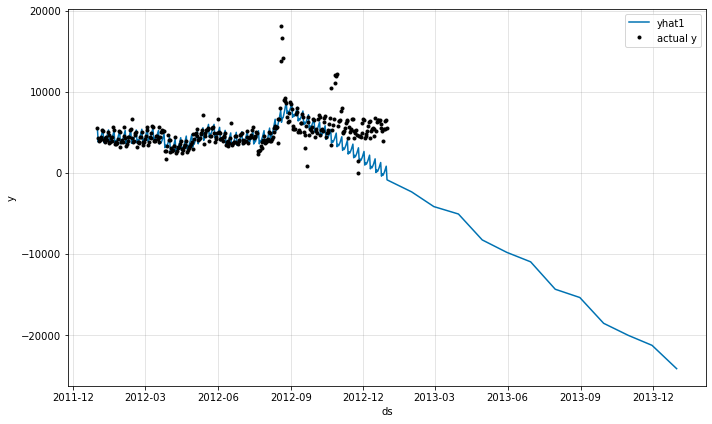

In [16]:
fig_forecast = m.plot(forecast)

In [29]:
## Visualize component

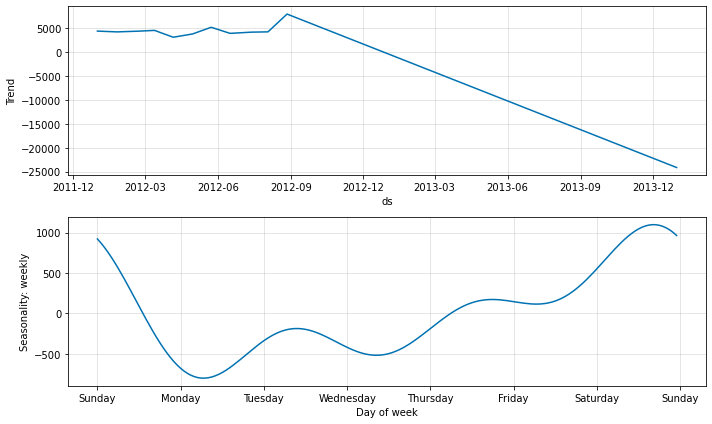

In [30]:
fig_components = m.plot_components(forecast)

## Visulaize the  model parameters

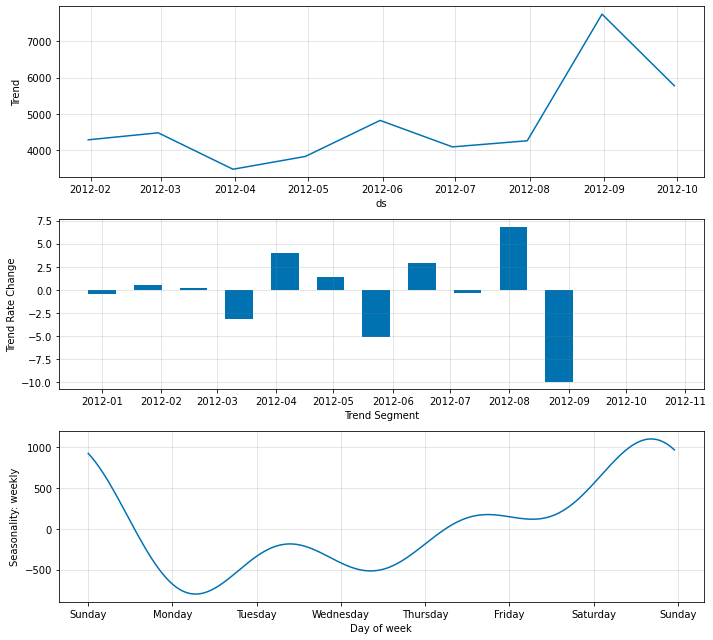

In [31]:
fig_model = m.plot_parameters()
